In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [10]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [11]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [12]:
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [13]:
start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [14]:
lim_catfish_sales[datetime(1998,12,1)] = 10000

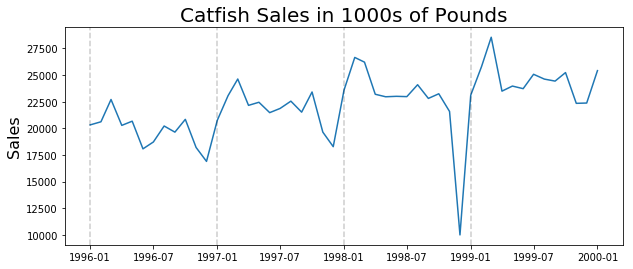

In [15]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
first_diff = lim_catfish_sales.diff()[1:]

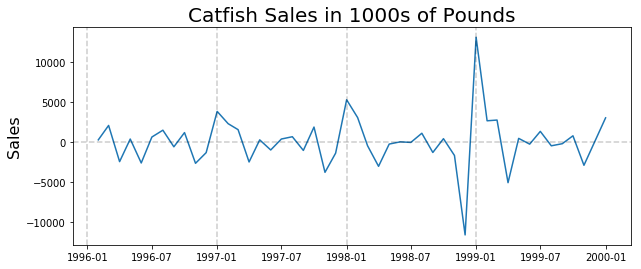

In [17]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)


In [18]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = lim_catfish_sales[train_end + timedelta(days=1):test_end]


In [19]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)

In [20]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average

In [21]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

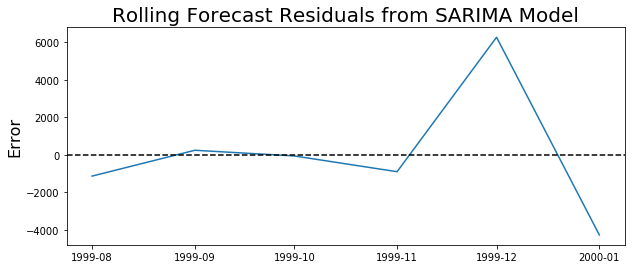

In [22]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)


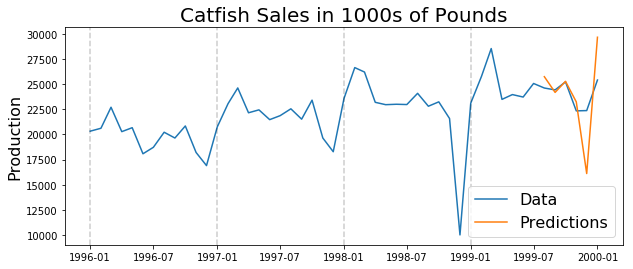

In [23]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [24]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0909


In [25]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 3149.0836497834307


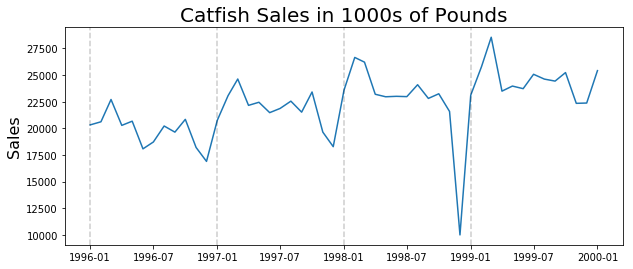

In [26]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [30]:
rolling_deviations = pd.Series(dtype=float, index = lim_catfish_sales.index)
rolling_deviations

Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
1996-04-01    20276
1996-05-01    20669
1996-06-01    18074
1996-07-01    18719
1996-08-01    20217
1996-09-01    19642
1996-10-01    20842
1996-11-01    18204
1996-12-01    16898
1997-01-01    20746
1997-02-01    23058
1997-03-01    24624
1997-04-01    22154
1997-05-01    22444
1997-06-01    21471
1997-07-01    21866
1997-08-01    22548
1997-09-01    21518
1997-10-01    23408
1997-11-01    19645
1997-12-01    18278
1998-01-01    23576
1998-02-01    26650
1998-03-01    26207
1998-04-01    23195
1998-05-01    22960
1998-06-01    23002
1998-07-01    22973
1998-08-01    24089
1998-09-01    22805
1998-10-01    23241
1998-11-01    21581
1998-12-01    10000
1999-01-01    23107
1999-02-01    25780
1999-03-01    28544
1999-04-01    23488
1999-05-01    23964
1999-06-01    23720
1999-07-01    25069
1999-08-01    24618
1999-09-01    24430
1999-10-01    25229
1999-11-01    22344
1999-12-01    22372
2000-01-01    25412
Freq: MS, Name:

In [31]:
for date in rolling_deviations.index:
    #get the window ending at this data point, it is creating window like [1996-01-01] to larger window[1996-01-01....2000-01-01]
    print(date)
    window = lim_catfish_sales.loc[:date]
    print(window)
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()
    print(rolling_deviations.loc[date])


1996-01-01 00:00:00
Date
1996-01-01    20322
Freq: MS, Name: Total, dtype: int64
nan
1996-02-01 00:00:00
Date
1996-01-01    20322
1996-02-01    20613
Freq: MS, Name: Total, dtype: int64
205.76807332528534
1996-03-01 00:00:00
Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
Freq: MS, Name: Total, dtype: int64
1299.4156378926643
1996-04-01 00:00:00
Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
1996-04-01    20276
Freq: MS, Name: Total, dtype: int64
1159.8044016126169
1996-05-01 00:00:00
Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
1996-04-01    20276
1996-05-01    20669
Freq: MS, Name: Total, dtype: int64
1013.927364262352
1996-06-01 00:00:00
Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
1996-04-01    20276
1996-05-01    20669
1996-06-01    18074
Freq: MS, Name: Total, dtype: int64
1472.8739253581755
1996-07-01 00:00:00
Date
1996-01-01    20322
1996-02-01    20613
1996-03-01    22704
1996-04-01    20276
1996-05-01 

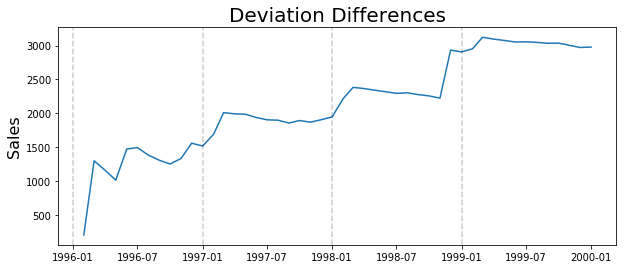

In [32]:
plt.figure(figsize=(10,4))
plt.plot(rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [33]:
#have to remove seasonality 
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

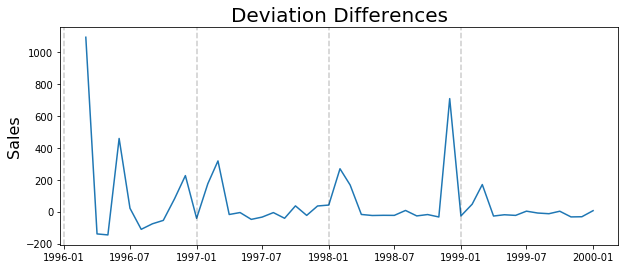

In [37]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [42]:
lim_catfish_sales.groupby(lambda d: d.year).std()

Date
1996    1558.985101
1997    1694.702244
1998    4194.667440
1999    1699.059961
2000            NaN
Name: Total, dtype: float64

In [39]:
#Attempt 2: Seasonal Method
month_deviations = lim_catfish_sales.groupby(lambda d: d.month).std()
month_deviations

Date
1     2105.840402
2     2741.500973
3     2473.136790
4     1452.396726
5     1379.643764
6     2510.305343
7     2648.906992
8     1973.452305
9     2025.372949
10    1800.032407
11    1876.056947
12    5146.228263
Name: Total, dtype: float64

Text(0, 0.5, 'Sales')

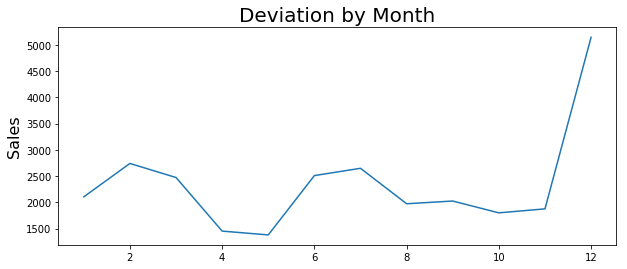

In [36]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [44]:
december_data = lim_catfish_sales[lim_catfish_sales.index.month == 12]
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [60]:
min_dev = 8888888 # in first step we dont have min_dev so we are setting the higest number 
curr_anomaly = None
for date in december_data.index:
    print(date)
    other_data = december_data[december_data.index != date]
    print(other_data)
    curr_dev = other_data.std()
    print(curr_dev)
    print(min_dev)
    if curr_dev < min_dev:
        min_dev=curr_dev
        curr_anomaly=date


1996-12-01 00:00:00
Date
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64
6302.810272674668
8888888
1997-12-01 00:00:00
Date
1996-12-01    16898
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64
6199.643323073783
6302.810272674668
1998-12-01 00:00:00
Date
1996-12-01    16898
1997-12-01    18278
1999-12-01    22372
Name: Total, dtype: int64
2846.925593220401
6199.643323073783
1999-12-01 00:00:00
Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
Name: Total, dtype: int64
4434.938706829366
2846.925593220401


In [61]:
curr_anomaly

Timestamp('1998-12-01 00:00:00')

In [78]:
december_data

Date
1996-12-01    16898
1997-12-01    18278
1998-12-01    10000
1999-12-01    22372
Name: Total, dtype: int64

In [79]:
december_data.index

DatetimeIndex(['1996-12-01', '1997-12-01', '1998-12-01', '1999-12-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [80]:
december_data.index != curr_anomaly

array([ True,  True, False,  True])

In [81]:
 test_data.index[0]

Timestamp('1999-08-01 00:00:00', freq='MS')

In [82]:
december_data.index < test_data.index[0]

array([ True,  True,  True, False])

In [87]:
december_data[(december_data.index != curr_anomaly)]

Date
1996-12-01    16898
1997-12-01    18278
1999-12-01    22372
Name: Total, dtype: int64

In [62]:
adjusted_data = lim_catfish_sales.copy()# we are removing the 10000 value abnormality and placing meand of normal average from the time series
adjusted_data.loc[curr_anomaly] = december_data[(december_data.index != curr_anomaly) & (december_data.index < test_data.index[0])].mean()

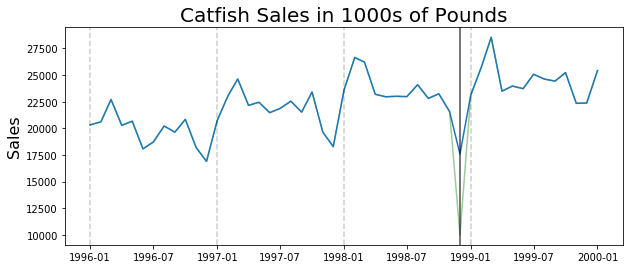

In [65]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales, color='g', alpha=0.4)
plt.plot(adjusted_data)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axvline(curr_anomaly, color='k', alpha=0.7)


In [88]:
train_end = datetime(1999,7,1)
test_end = datetime(2000,1,1)

test_data = adjusted_data[train_end + timedelta(days=1):test_end]

In [89]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = adjusted_data[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-statio

In [90]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

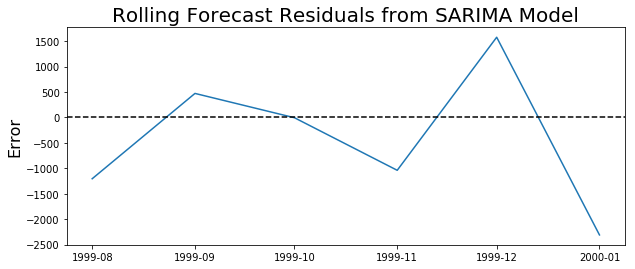

In [91]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

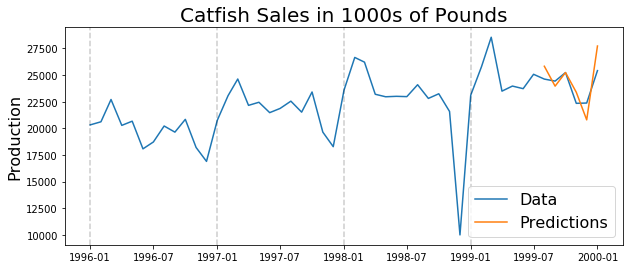

In [92]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)


In [93]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0461


In [94]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 1327.9987449793266
